<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
import_path = './datasets/sacramento_real_estate_transactions.csv'
data = pd.read_csv(import_path)
df_sac = pd.DataFrame(data)

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [3]:
df_sac.shape

(985, 12)

In [4]:
df_sac.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
df_sac.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [6]:
df_sac['sale_date'] = pd.to_datetime(df_sac['sale_date'])

C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


In [7]:
df_sac.dtypes

street               object
city                 object
zip                   int64
state                object
beds                  int64
baths                 int64
sq__ft                int64
type                 object
sale_date    datetime64[ns]
price                 int64
latitude            float64
longitude           float64
dtype: object

In [8]:
df_sac.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

Confirmed no null values.

In [9]:
def subplot_dist(df, kind='dist', cols=None, titles=None, xlabels=None, ylabels=None, meanline=False, medianline=False, **kwargs):
    # Accepts all columns if they can be converted to numbers if cols argument
    # is not given.
    if not cols:
        cols = []
        for col in df.columns:
            try:
                df[col] = pd.to_numeric(df[col])
                cols.append(col)
            except ValueError:
                pass

    # Sets number of figure rows based on number of DataFrame columns.
    nrows = int(np.ceil(len(cols)/2))
    # Sets figure size based on number of figure rows.
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16, 5*nrows))
    # Makes the list of lists flat.
    ax = ax.ravel()

    for i, col in enumerate(cols):
        is_list = isinstance(col, (list, tuple))
        if is_list and kind != 'box':
            print('distplot does not plot multiple series in one graph.')
            continue
        if kind == 'dist':
            sb.distplot(df[col], ax=ax[i], **kwargs)
            if meanline:
                ax[i].axvline(np.mean(df[col]), color='r', linestyle='-', linewidth=1)
            if medianline:
                ax[i].axvline(np.median(df[col]), color='purple', linestyle='--', linewidth=1)
        # Boxplotting option.
        elif kind == 'box':
            sb.boxplot(data=df[col], ax=ax[i], **kwargs)
            # xticklabels will be the first letter of string if not passed as a
            # list.
            if is_list:
                ax[i].set_xticklabels(col)
            else:
                ax[i].set_xticklabels([col])
                if meanline:
                    ax[i].axhline(np.mean(df[col]), color='r', linestyle='-', linewidth=1)

        if titles:
            ax[i].set_title(titles[i])
        if xlabels:
            ax[i].set_xlabel(xlabels[i])
        if ylabels:
            ax[i].set_ylabel(ylabels[i])

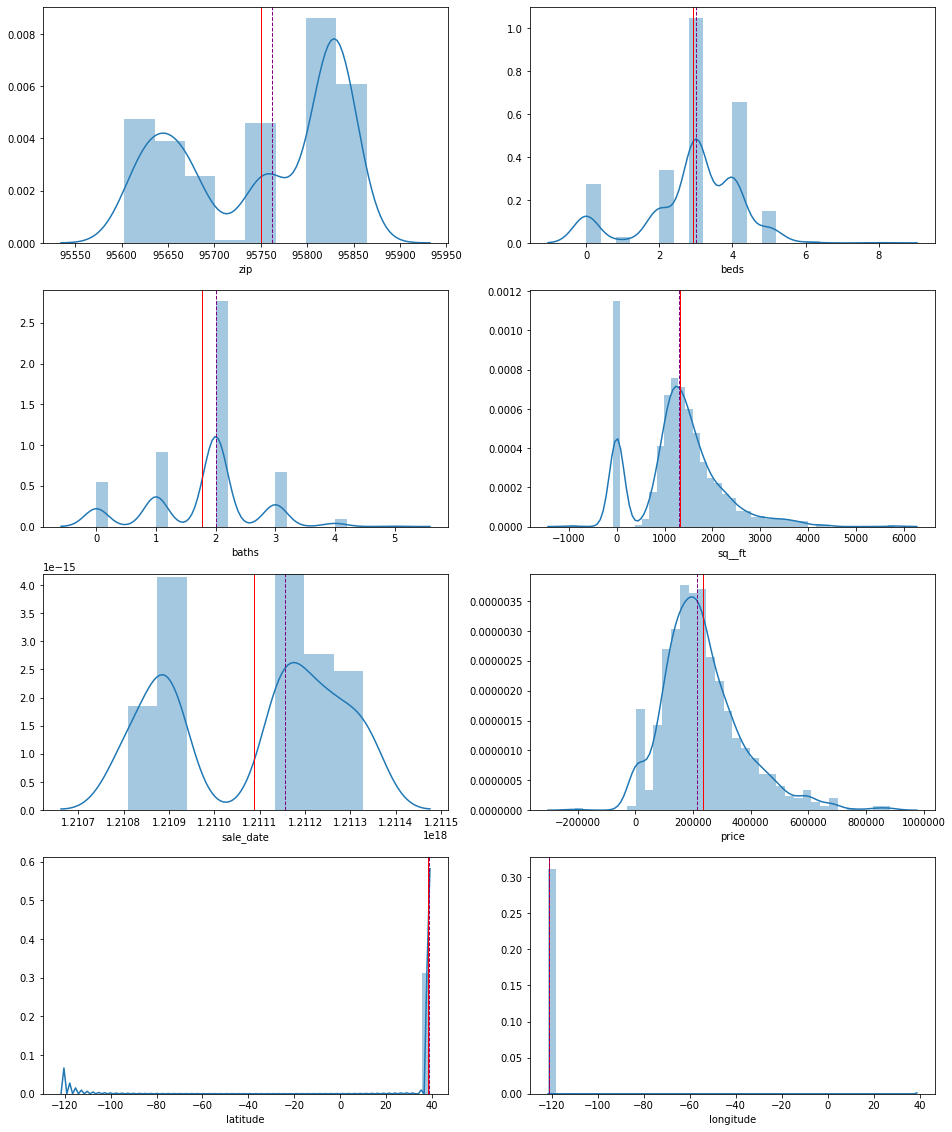

In [10]:
subplot_dist(df_sac, meanline=True, medianline=True)

In [11]:
df_sac.describe()

,zip,beds,baths,sq__ft,sale_date,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,9.850000e+02,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,1.211088e+18,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,1.841391e+14,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,1.210810e+18,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,1.210896e+18,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,1.211155e+18,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,1.211242e+18,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,1.211328e+18,884790.000000,39.020808,38.668433


In [12]:
df_sac[df_sac['beds'] == 0]['baths'].sum()

0

In [13]:
df_sac[df_sac['beds'] == 0]['sq__ft'].sum()

0

In [14]:
df_sac = df_sac[df_sac['beds'] > 0]

In [15]:
df_sac.describe()

,zip,beds,baths,sq__ft,sale_date,price,latitude,longitude
count,877.000000,877.000000,877.000000,877.000000,8.770000e+02,877.000000,877.000000,877.000000
mean,95757.114025,3.270239,1.995439,1474.600912,1.211085e+18,239396.838084,38.408044,-121.179506
std,84.820726,0.864675,0.680771,764.605466,1.881190e+14,131048.864273,5.407625,5.405580
min,95603.000000,1.000000,1.000000,-984.000000,1.210810e+18,-210944.000000,-121.503471,-121.550527
25%,95670.000000,3.000000,2.000000,1093.000000,1.210896e+18,150000.000000,38.477563,-121.448159
50%,95815.000000,3.000000,2.000000,1373.000000,1.211155e+18,215000.000000,38.617790,-121.385792
75%,95828.000000,4.000000,2.000000,1800.000000,1.211242e+18,297500.000000,38.684790,-121.310352
max,95864.000000,8.000000,5.000000,5822.000000,1.211328e+18,884790.000000,39.008159,38.668433


In [16]:
df_sac = df_sac[df_sac['sq__ft'] > 0]

In [17]:
df_sac = df_sac.drop(columns=['latitude', 'longitude'])

In [18]:
df_sac.describe(include='object')

,street,city,state,type
count,813,813,813,813
unique,810,36,1,3
top,8306 CURLEW CT,SACRAMENTO,CA,Residential
freq,2,423,813,759


In [19]:
del df_sac['state']

In [20]:
df_dum = pd.get_dummies(df_sac['type'], drop_first=True)
df_sac = df_sac.join(df_dum)

In [27]:
df_sac.head()

,street,city,zip,beds,baths,sq__ft,type,sale_date,price,Multi-Family,Residential
0,3526 HIGH ST,SACRAMENTO,95838,2,1,836,Residential,1211328000000000000,59222,0,1
1,51 OMAHA CT,SACRAMENTO,95823,3,1,1167,Residential,1211328000000000000,68212,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,2,1,796,Residential,1211328000000000000,68880,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,2,1,852,Residential,1211328000000000000,69307,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,2,1,797,Residential,1211328000000000000,81900,0,1


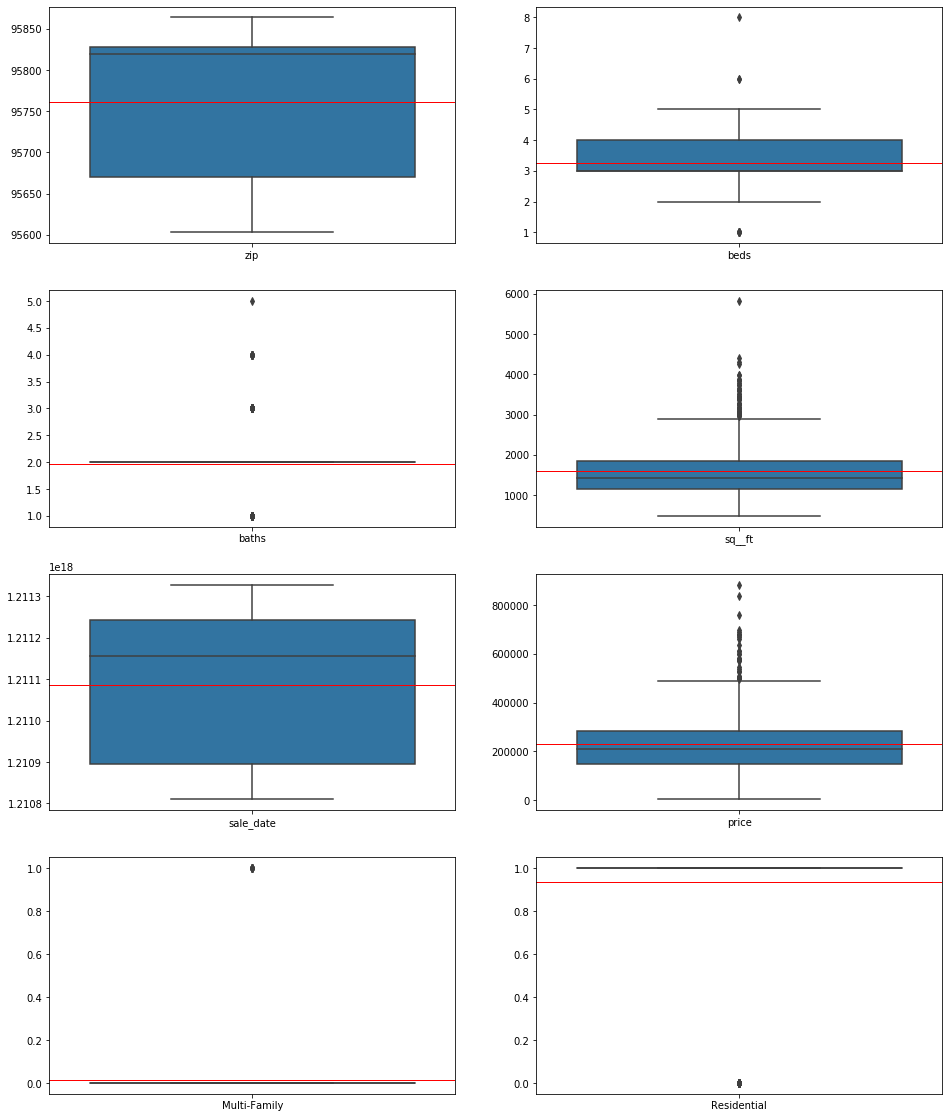

In [22]:
subplot_dist(df_sac, kind='box', meanline=True)

(8.0, 0.0)

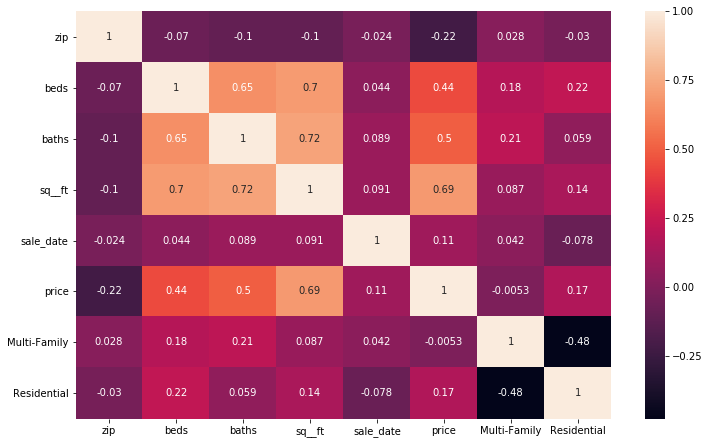

In [23]:
fig, ax = plt.subplots(figsize=(12, 7.5))
sb.heatmap(df_sac.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [24]:
export_path = './datasets/sacramento_real_estate_transactions_Clean.csv'
df_sac.to_csv(export_path)

#### Erroneous or useless data

1. The data on the number of beds had a number of 0 or values. These rows also had a beds number of 0 and sq__ft number of 0. As this information likely has great impact on the price of the property, I decided to drop the rows.

2. After dropping rows with beds values of 0, there were still rows with 0 or negative values. As these values are impossible, I decided to drop the rows.

3. The columns latitude and longitude contain geographical information that is already covered under zip code. Furthermore, the columns contain a number of impossible values. An internet search will return the coordinates of Sacramento as 38.575764, -121.478851, thus values that deviate far from these are geographically impossible. I dropped the columns.

4. The state column is useless as it has only a single category. I dropped the column.


#### Data validated

1. A quick internet search has confirmed all zip codes within the range of the dataset as possible.

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [26]:
import sklearn.linear_model as sklm

lm = sklm.LinearRegression()

X = df_sac['beds']
y = df_sac['price']

model = lm.fit(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[2 3 2 2 2 3 3 3 2 3 3 3 1 3 2 2 2 2 2 3 3 4 4 3 3 3 3 3 4 3 2 3 3 3 2 3 3
 4 4 1 2 3 3 2 4 4 4 4 4 3 3 4 3 4 3 3 4 3 3 4 3 3 4 3 3 3 3 3 4 3 4 3 3 3
 4 4 2 5 4 3 3 4 4 4 3 3 3 3 3 5 3 4 2 3 4 5 3 3 3 3 3 4 3 2 4 8 4 4 3 2 4
 5 3 2 5 4 5 5 4 2 3 4 3 4 3 4 4 4 3 5 5 4 4 3 4 3 4 3 5 5 5 4 4 5 4 3 2 4
 2 2 2 3 4 3 2 3 2 2 1 3 1 3 3 3 2 3 3 3 3 3 3 3 2 3 3 3 3 2 3 2 4 3 4 3 3
 3 4 2 3 2 2 2 3 2 3 3 3 3 3 3 2 3 4 4 3 4 3 3 3 3 4 4 2 2 4 3 3 3 4 3 4 4
 3 2 3 3 3 3 3 4 2 3 4 3 3 5 3 4 3 4 4 4 3 4 4 4 3 4 3 3 3 3 3 4 3 4 3 4 2
 3 3 2 4 3 4 4 4 3 4 4 5 5 3 4 4 5 4 2 4 3 4 4 5 2 4 4 5 4 4 5 5 4 2 1 3 2
 2 2 2 2 2 2 3 2 3 3 2 2 3 2 4 1 2 4 3 3 4 3 2 2 2 3 3 4 2 2 3 2 3 3 3 2 4
 4 2 2 4 3 2 2 3 3 3 3 4 3 5 3 3 3 3 4 3 3 2 2 3 2 3 4 4 3 3 4 3 3 3 3 3 4
 2 3 3 3 3 3 3 3 3 2 4 4 4 3 4 2 4 4 3 3 3 2 4 3 3 4 3 4 3 2 4 3 2 3 3 2 4
 5 3 3 4 4 4 5 4 3 4 4 4 3 3 4 3 4 2 4 4 4 4 3 3 4 3 4 4 3 3 3 2 4 3 5 4 4
 3 4 4 4 3 3 5 5 5 4 3 4 3 4 4 4 4 3 3 2 3 3 5 3 4 4 4 2 3 4 4 5 3 4 3 3 3
 4 5 4 4 5 3 5 5 3 2 2 2 2 2 2 2 2 2 2 3 2 2 4 2 4 2 1 3 3 3 3 3 4 3 4 3 4
 3 2 4 3 3 3 3 2 3 3 4 3 3 3 4 6 3 3 4 3 4 3 3 5 4 3 3 3 3 3 3 3 3 3 4 3 3
 3 3 3 3 4 3 4 3 3 3 3 4 2 3 3 3 4 4 3 3 3 3 3 4 3 2 3 4 4 3 3 4 3 4 3 4 2
 2 4 3 2 4 3 5 3 4 4 3 3 5 3 4 3 4 4 3 2 3 4 3 4 3 3 4 3 3 4 3 3 3 4 3 3 3
 3 3 5 3 4 5 3 4 3 3 4 3 4 4 4 4 4 2 2 3 6 3 5 3 3 3 4 4 5 4 4 5 3 3 4 4 3
 4 4 4 3 3 4 5 5 3 3 3 3 4 4 3 3 3 3 5 4 2 3 4 3 5 5 4 4 4 3 3 2 4 5 4 5 4
 3 4 1 2 2 2 2 4 3 2 2 3 3 3 3 1 3 3 3 3 3 3 4 3 2 4 3 3 3 3 4 2 3 3 3 3 3
 2 3 4 2 3 3 3 3 3 4 3 2 4 3 3 3 4 3 3 2 3 2 3 3 4 4 3 3 3 3 4 4 3 3 3 3 3
 3 3 3 4 4 2 3 2 2 3 3 3 4 3 3 3 3 3 3 3 4 4 4 3 3 3 3 3 4 4 3 4 3 3 4 3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [ ]:
# A:

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [ ]:
# A:

### 6. Interpret the intercept. Interpret the slope.

In [ ]:
# A:

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [ ]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [ ]:
# A:

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [ ]:
# A:

---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [ ]:
# A:

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [ ]:
# A:

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

In [ ]:
# A:

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [ ]:
# A:

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [ ]:
# A:

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [ ]:
# A:

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [ ]:
# A:

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [ ]:
# A:

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [ ]:
# A: